# Circadian amplitude boost plots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'


/var/folders/x8/sv9j87dj0tn_b0s51zffp0xw0000gn/T/ipykernel_10697/812892720.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# St. Hilaire 12 light schedule (1 hr light pulse)

## Load experimental data

In [ ]:
data_path = "hilaire_12_Fig3A_digitized_data.csv"
experimental_data = pd.read_csv(data_path)

## Load simulation result

In [ ]:
simulation_result = np.load('simulation_result_1hr_pulse_constant_routine.npy', allow_pickle=True).item()

In [ ]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
first_constant_routine_duration = simulation_result['first_constant_routine_duration']

## Plot setup

In [ ]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.54

afternoon_start = -8  # Hours before DLMO
afternoon_end = -1

ylabel_font_size = 30
xlabel_font_size = 30
title_font_size = 25
xtick_font_size = 25
ytick_font_size = 25
legend_font_size = 20
figsize=(12, 8)
axis_label_font_size = 12

## PRC

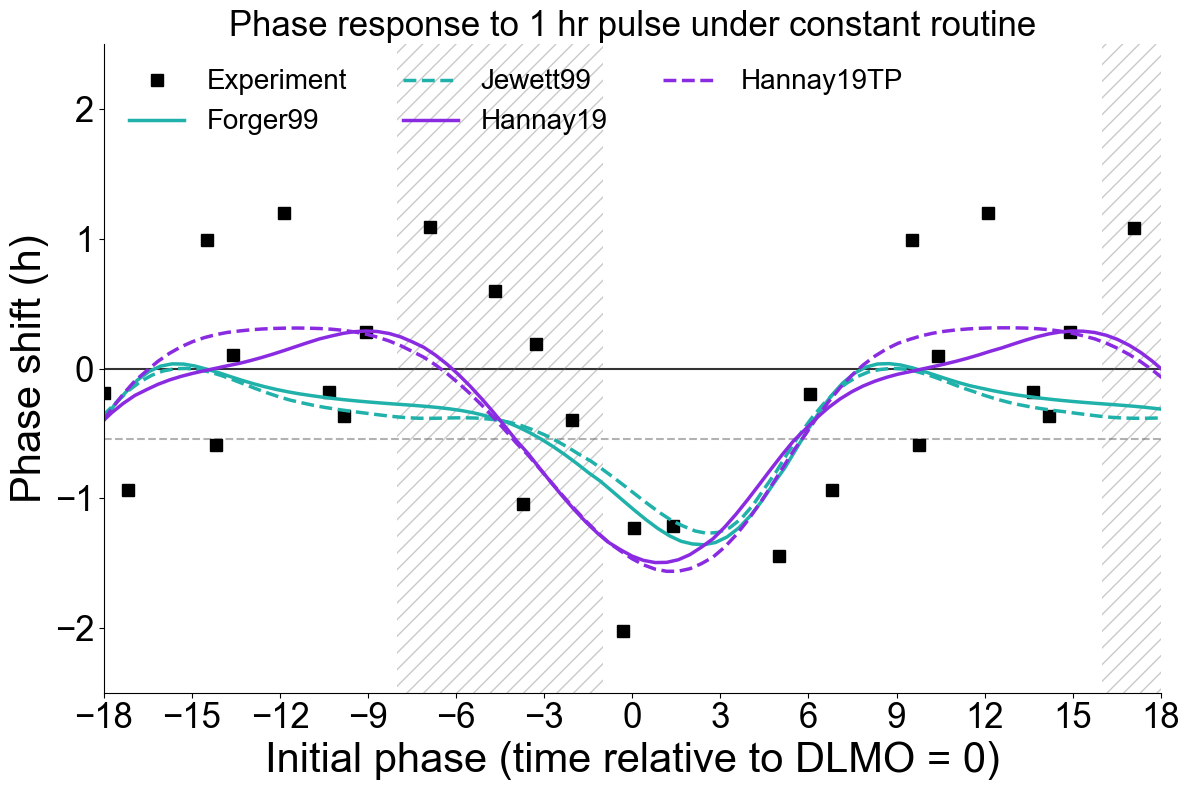

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=figsize)
rect = patches.Rectangle((afternoon_start, -2.5), afternoon_end - afternoon_start, 5, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

rect = patches.Rectangle((afternoon_start + 24, -2.5), afternoon_end - afternoon_start, 5, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

# experimental data
plt.plot(experimental_data['initial_phase'], 
         experimental_data['phase_shift'], 's', markersize=8,
         label='Experiment', color='black')
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=xlabel_font_size)
plt.ylabel('Phase shift (h)', fontsize=ylabel_font_size)
plt.xlim(-18, 18)
plt.ylim(-2.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=xtick_font_size)
plt.yticks(fontsize=ytick_font_size)
plt.legend(fontsize=legend_font_size, frameon=False, ncol=3)
plt.title("Phase response to 1 hr pulse under constant routine", fontsize=title_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("outputs/prc_1.png",dpi=500)
plt.show()

## ARC

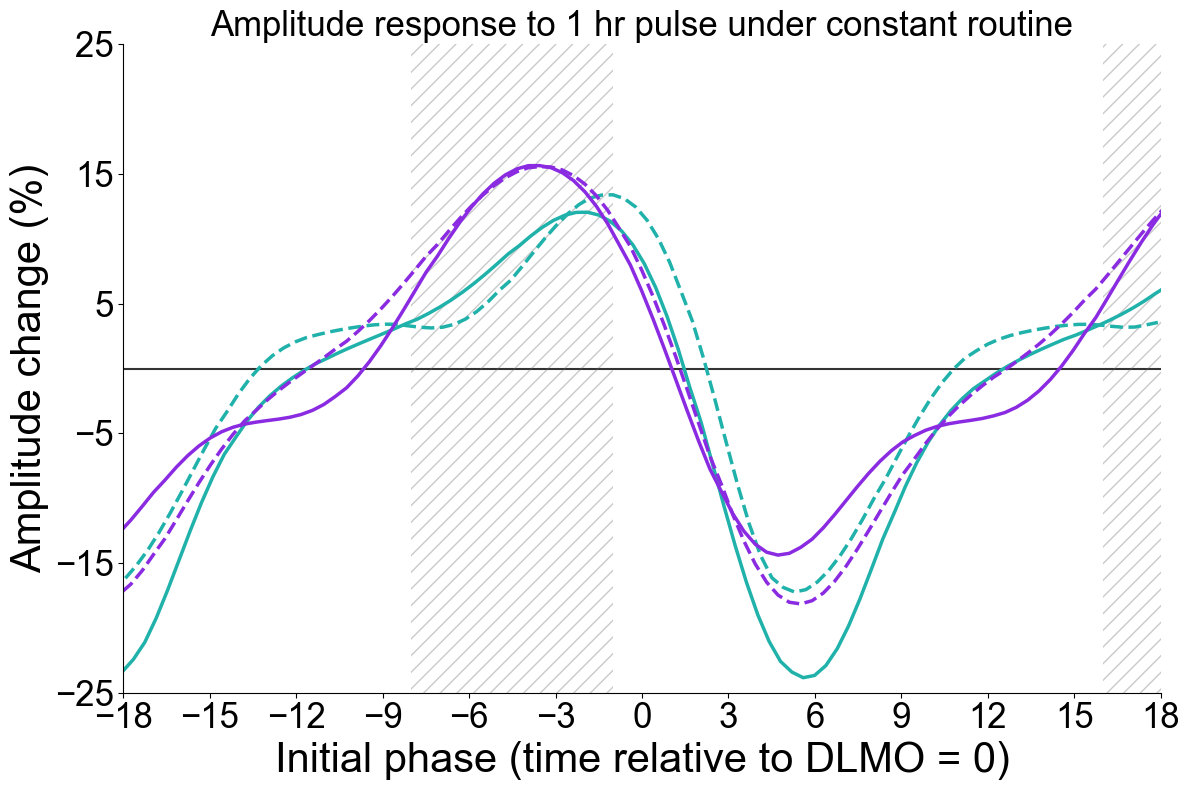

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
rect = patches.Rectangle((afternoon_start, -25), afternoon_end - afternoon_start, 50, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

rect = patches.Rectangle((afternoon_start + 24, -25), afternoon_end - afternoon_start, 50, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=xlabel_font_size)
plt.ylabel('Amplitude change (%)', fontsize=ylabel_font_size)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=xtick_font_size)
plt.yticks(np.linspace(-25, 25, 6), fontsize=ytick_font_size)
# plt.legend(fontsize=legend_font_size, frameon=False, ncol=5)
plt.title("Amplitude response to 1 hr pulse under constant routine", fontsize=title_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("outputs/arc_1.png",dpi=500)

plt.show()

## Compare simulation with Hannay et al. 19

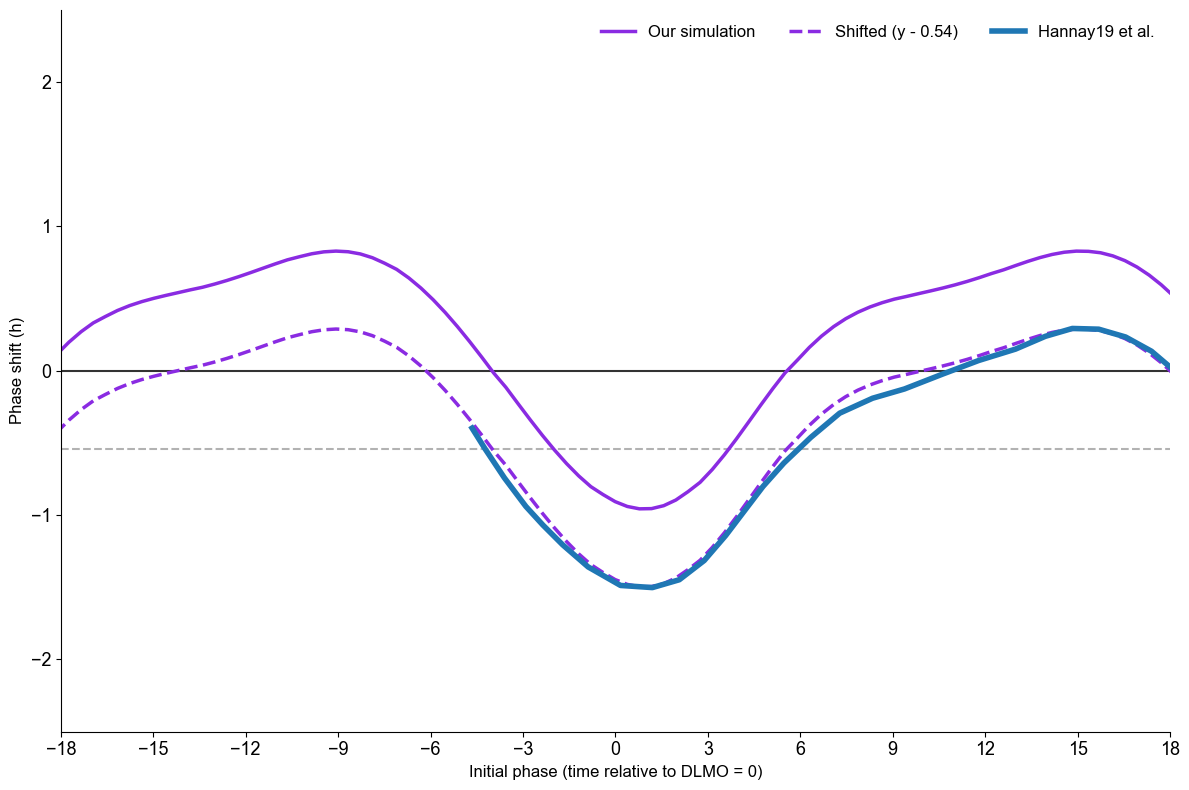

In [ ]:
hannay_19_simulation = pd.read_csv('hannay_19_short_pulse_simulation.csv', header=None, names=['CT', 'phase_shift'])

## Create the initial phase column
time_shift = 4.75
hannay_19_simulation['initial_phase'] = hannay_19_simulation['CT'] - time_shift
## Reorder rows by initial_phase
hannay_19_simulation = hannay_19_simulation.sort_values(by='initial_phase')

model = 'Hannay19'
fig, ax = plt.subplots(1, 1, figsize=figsize)
# simulation results
x = []
y = simulation_result[str(model)]['phase_response']
# calculate the initial phase
for CR1_index in range(pulse_num):
    CR1_duration = first_constant_routine_duration[CR1_index]
    pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
    dlmo = simulation_result[str(model)]['reference_dlmo']
    x.append(pulse_mid_time - dlmo)
plt.plot(x, y, label='Our simulation', lw=2.5,
            color=colors[str(model)], linestyle=linestyles[str(model)])
plt.plot(x, y - 0.54, label='Shifted (y - 0.54)', lw=2.5,
            color=colors[str(model)], linestyle='--')
# hannay 19 results for hannay
plt.plot(hannay_19_simulation['initial_phase'],
        hannay_19_simulation['phase_shift'], 
        label='Hannay19 et al.', lw=4, color='tab:blue',
        )
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=axis_label_font_size)
plt.ylabel('Phase shift (h)', fontsize=axis_label_font_size)
plt.xlim(-18, 18)
plt.ylim(-2.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, frameon=False, ncol=5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Ruger 12 light schedule (6.5 h light pulse)

## Load experimental data

In [ ]:
data_path = "ruger_12_Fig2_digitized_data.csv"
experimental_data = pd.read_csv(data_path)

## Load simuation result

In [ ]:
simulation_result = np.load('simulation_result_6-5hr_pulse_constant_routine.npy', allow_pickle=True).item()

In [ ]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
first_constant_routine_duration = simulation_result['first_constant_routine_duration']
pulse_duration = simulation_result['pulse_duration']

## Plot setup

In [ ]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.54

## PRC

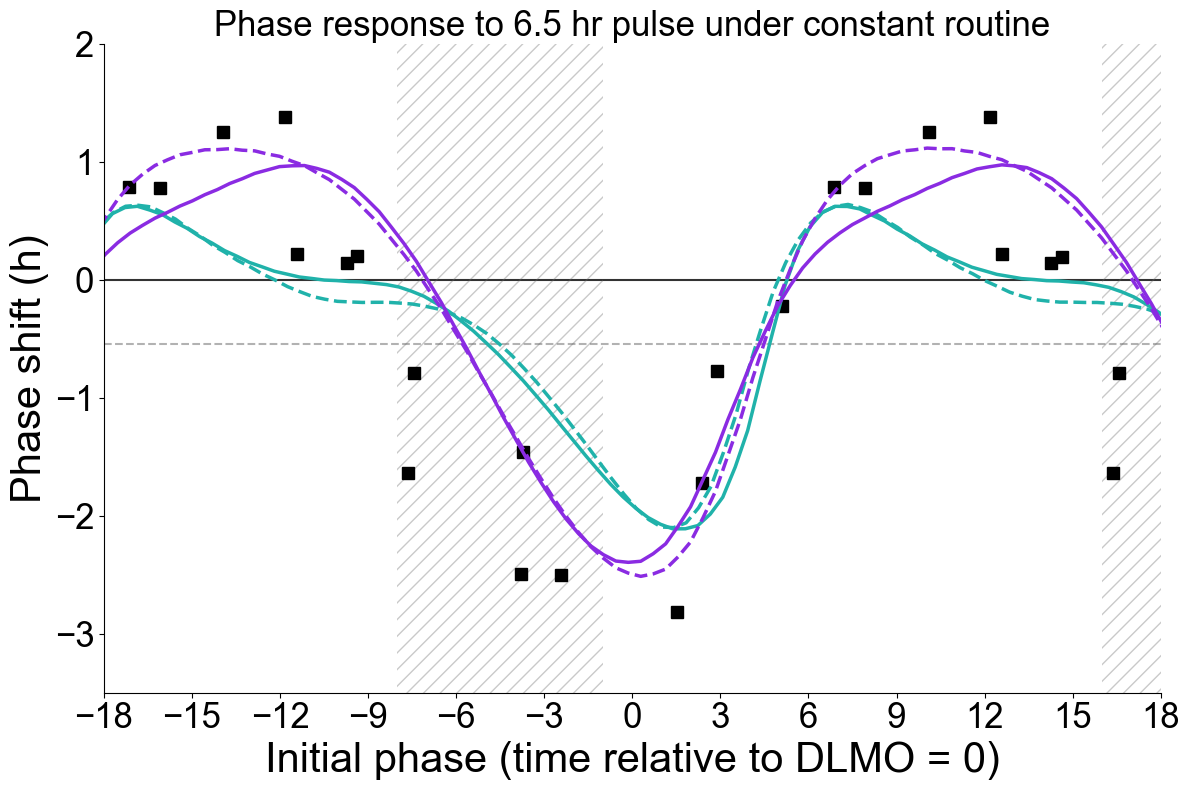

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

rect = patches.Rectangle((afternoon_start, -4), afternoon_end - afternoon_start, 10, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

rect = patches.Rectangle((afternoon_start + 24, -4), afternoon_end - afternoon_start, 10, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

# experimental data
plt.plot(experimental_data['initial_phase'], 
         experimental_data['phase_shift'], 's', markersize=8,
         label='Experiment', color='black')
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        ## Different from Hilaire 12
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        pulse_start_time = pulse_mid_time - pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_start_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=xlabel_font_size)
plt.ylabel('Phase shift (h)', fontsize=ylabel_font_size)
plt.xlim(-18, 18)
plt.ylim(-3.5, 2)
plt.xticks(np.linspace(-18, 18, 13), fontsize=xtick_font_size)
plt.yticks(fontsize=ytick_font_size)
# plt.legend(fontsize=legend_font_size, frameon=False, ncol=5)
plt.title("Phase response to 6.5 hr pulse under constant routine", fontsize=title_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("outputs/prc_65.png",dpi=500)

plt.show()

## ARC

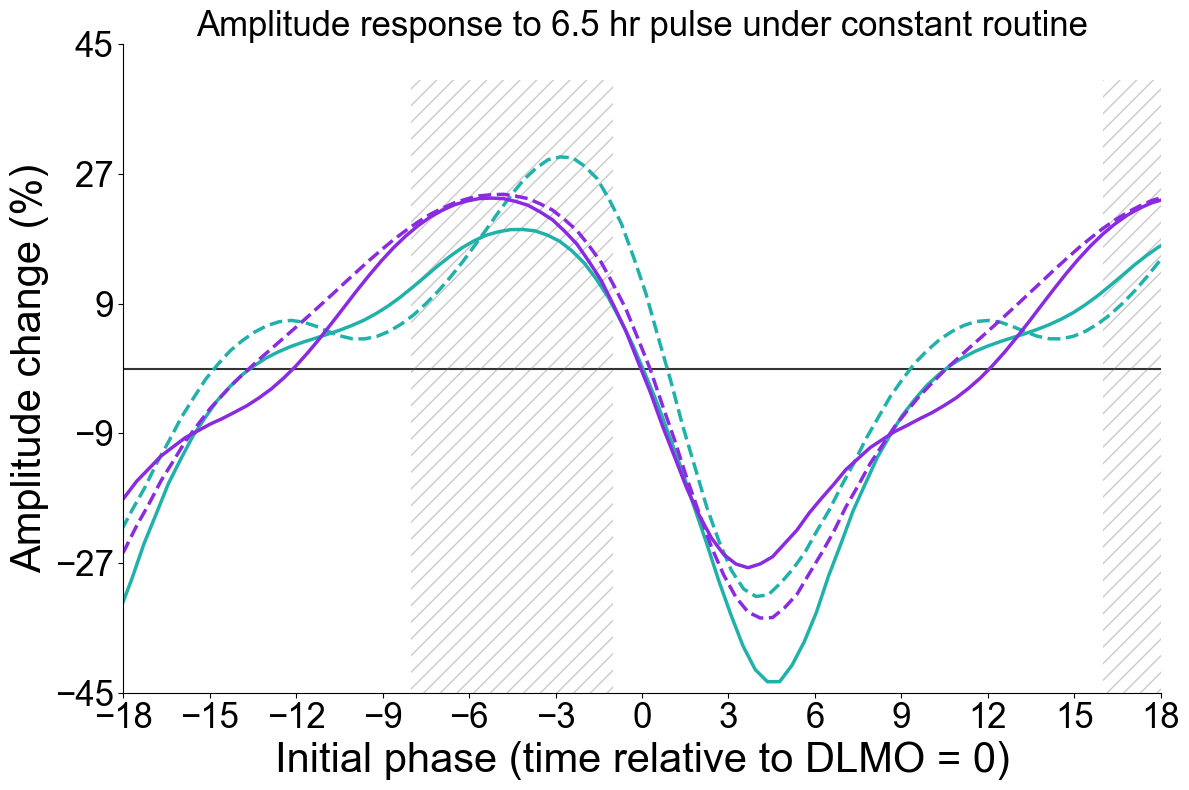

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

rect = patches.Rectangle((afternoon_start, -60), afternoon_end - afternoon_start, 100, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)

rect = patches.Rectangle((afternoon_start + 24, -60), afternoon_end - afternoon_start, 100, linewidth=0,
                         edgecolor=[0.4, 0.4, 0.4], facecolor='none', hatch='//', alpha=0.35)
ax.add_patch(rect)
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        ## Different from Hilaire 12
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        pulse_start_time = pulse_mid_time - pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_start_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=xlabel_font_size)
plt.ylabel('Amplitude change (%)', fontsize=ylabel_font_size)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=xtick_font_size)
plt.yticks(np.linspace(-45, 45, 6), fontsize=ytick_font_size)
# plt.legend(fontsize=legend_font_size, frameon=False, ncol=5)
plt.title("Amplitude response to 6.5 hr pulse under constant routine", fontsize=title_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("outputs/arc_65.png",dpi=500)

plt.show()

## Compare simulation with Hannay et al. 19

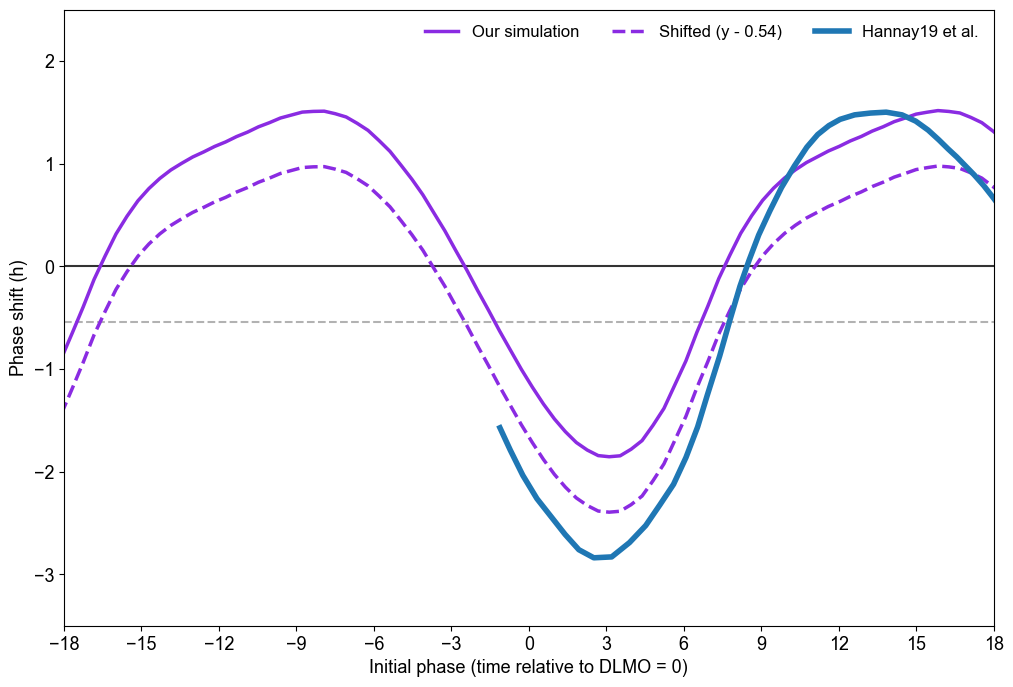

In [ ]:
hannay_19_simulation = pd.read_csv('hannay_19_long_pulse_simulation.csv', header=None, names=['CT', 'phase_shift'])

## Create the initial phase column
time_shift = 1.1
hannay_19_simulation['initial_phase'] = hannay_19_simulation['CT'] - time_shift
## Reorder rows by initial_phase
hannay_19_simulation = hannay_19_simulation.sort_values(by='initial_phase')

model = 'Hannay19'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
x = []
y = simulation_result[str(model)]['phase_response']
# calculate the initial phase
for CR1_index in range(pulse_num):
    CR1_duration = first_constant_routine_duration[CR1_index]
    pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
    dlmo = simulation_result[str(model)]['reference_dlmo']
    x.append(pulse_mid_time - dlmo)
plt.plot(x, y, label='Our simulation', lw=2.5,
            color=colors[str(model)], linestyle=linestyles[str(model)])
plt.plot(x, y - 0.54, label='Shifted (y - 0.54)', lw=2.5,
            color=colors[str(model)], linestyle='--')
# hannay 19 results for hannay
plt.plot(hannay_19_simulation['initial_phase'],
        hannay_19_simulation['phase_shift'], 
        label='Hannay19 et al.', lw=4, color='tab:blue',
        )
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=13)
plt.ylabel('Phase shift (h)', fontsize=13)
plt.xlim(-18, 18)
plt.ylim(-3.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, frameon=False, ncol=5)
plt.show()

# Regular schedule (1 hr light pulse)

## Load simulation result

In [ ]:
simulation_result = np.load('simulation_result_1hr_pulse_regular_schedule.npy', allow_pickle=True).item()

In [ ]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
pulse_start_values = simulation_result['pulse_start_values']
pulse_duration = simulation_result['pulse_duration']

## Plot setup

In [ ]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.0

## PRC

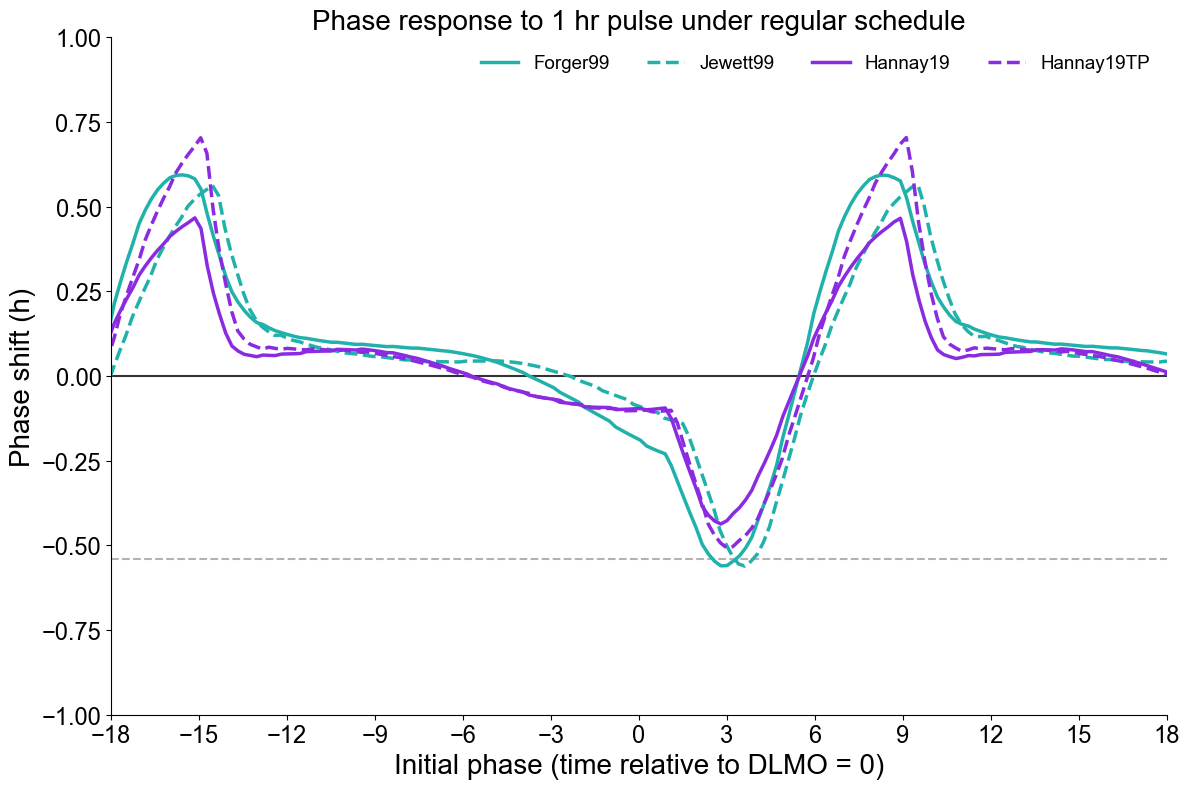

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for pulse_index in range(pulse_num):
        pulse_start = pulse_start_values[pulse_index]
        pulse_mid_time = pulse_start + pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Phase shift (h)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-1, 1)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Phase response to 1 hr pulse under regular schedule", fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

## ARC

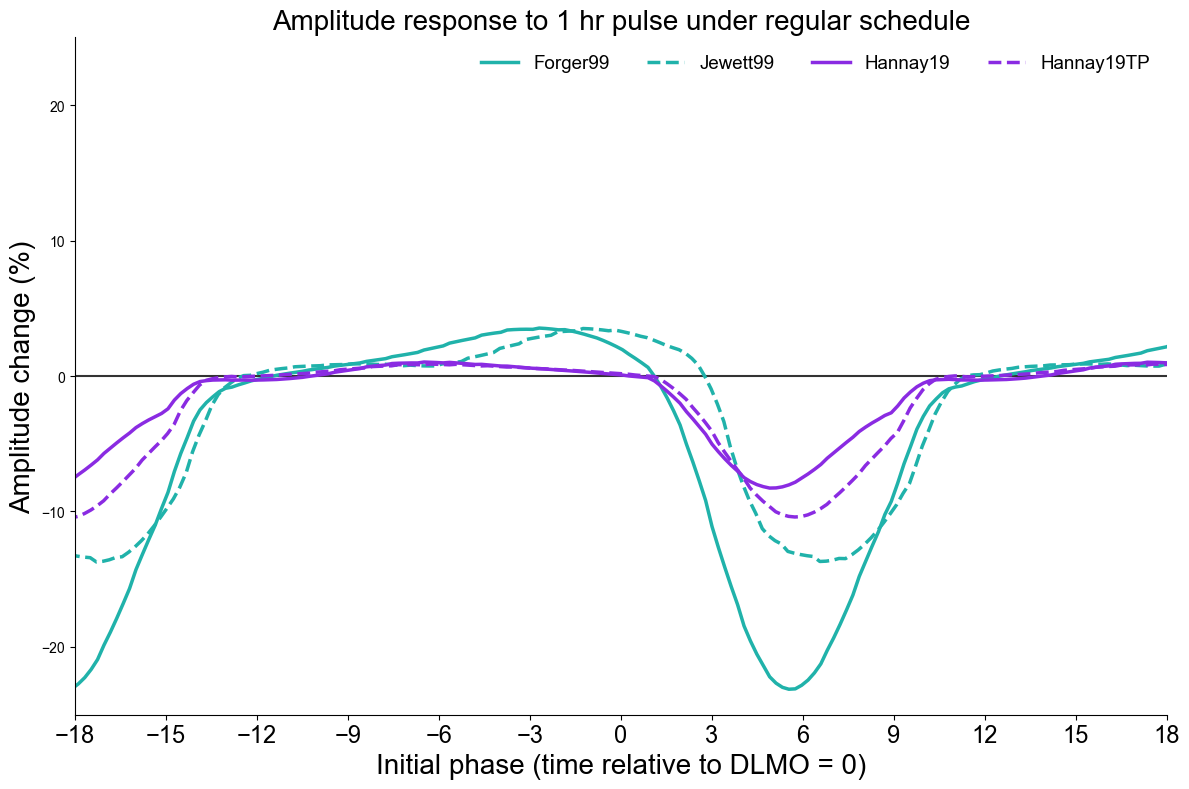

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for pulse_index in range(pulse_num):
        pulse_start = pulse_start_values[pulse_index]
        pulse_mid_time = pulse_start + pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Amplitude change (%)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
# plt.yticks(np.linspace(-25, 25, 6), fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Amplitude response to 1 hr pulse under regular schedule", fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

## Load trajectories

In [ ]:
trajectories = np.load("trajectories_1hr_pulse_regular_schedule.npy", allow_pickle=True).item()

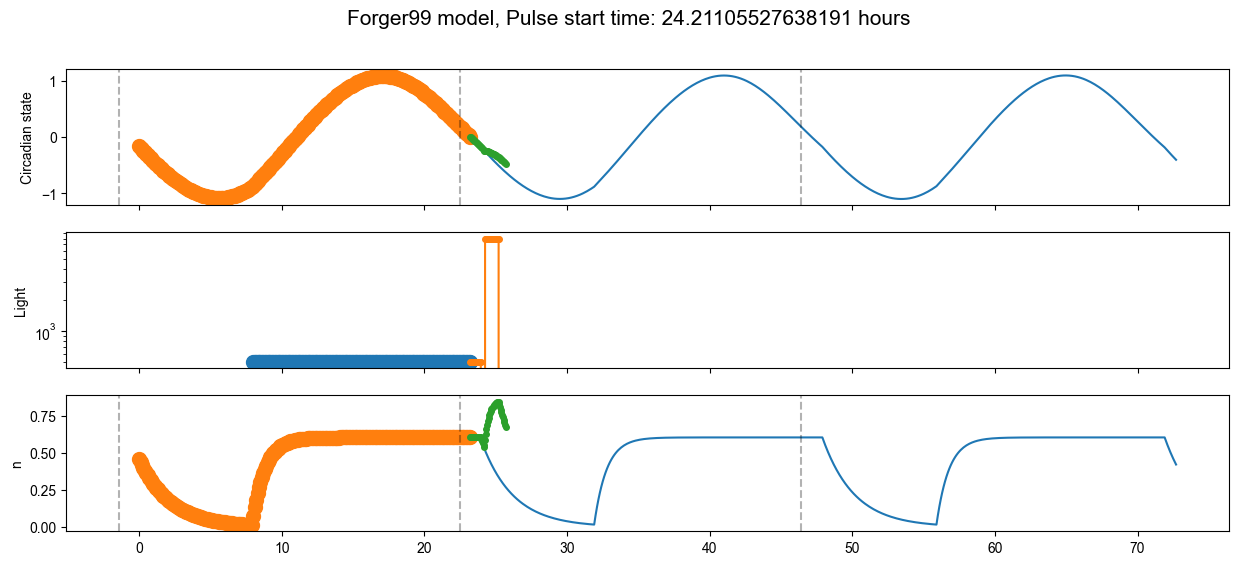

In [ ]:
pulse_index = 1
model = 'Forger99'
trajectory = trajectories[model][str(pulse_index)]
# initial_phase = time - trajectory['control_dlmos'][6]
fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(15, 6)
# title
fig.suptitle(f'Forger99 model, Pulse start time: {pulse_start_values[pulse_index]} hours', fontsize=15)
axs[0].plot(trajectory['control'].time, 
            trajectory['control'].states[:,0], label='Control')
axs[0].plot(trajectory['pulse_first_part'].time, 
            trajectory['pulse_first_part'].states[:,0], label='Pulse first sim', marker='o', markersize=10)
axs[0].plot(trajectory['pulse_second_part'].time, 
            trajectory['pulse_second_part'].states[:,0], label='Pulse first sim', marker='o', markersize=4)
axs[0].set_ylabel("Circadian state")
# plot dlmos as vertical dashed lines
for dlmo in trajectory['control_dlmos']:
    axs[0].axvline(x=dlmo, color='black', linestyle='--', alpha=0.3)

axs[1].plot(trajectory['pulse_first_part'].time, 
            trajectory['light_first_part'], label='Light', marker='o', markersize=10)
axs[1].plot(trajectory['pulse_second_part'].time, 
            trajectory['light_second_part'], label='Light', marker='o', markersize=4)
axs[1].set_ylabel("Light")
axs[1].set_yscale('log')

axs[2].plot(trajectory['control'].time, 
            trajectory['control'].states[:,2], label='Control')
axs[2].plot(trajectory['pulse_first_part'].time, 
            trajectory['pulse_first_part'].states[:,2], label='Pulse first sim', marker='o', markersize=10)
axs[2].plot(trajectory['pulse_second_part'].time, 
            trajectory['pulse_second_part'].states[:,2], label='Pulse first sim', marker='o', markersize=4)
axs[2].set_ylabel("n")
# plot dlmos as vertical dashed lines
for dlmo in trajectory['control_dlmos']:
    axs[2].axvline(x=dlmo, color='black', linestyle='--', alpha=0.3)

pulse_mid_time = pulse_start_values[pulse_index] + pulse_duration/2
# axs[1].set_xlim(pulse_mid_time - 2.5, pulse_mid_time + 2.5)
plt.show()

## Response of n variable to pulses

### Compare all n variables for the control schedule

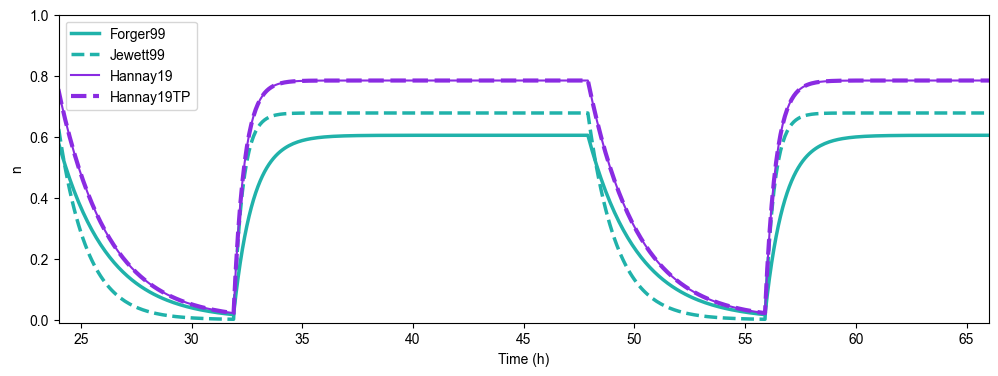

In [ ]:
n_variable_index = {
    'Forger99': 2,
    'Jewett99': 2,
    'Hannay19': 2,
    'Hannay19TP': 4,
}
linewidths = {
    'Forger99': 2.5,
    'Jewett99': 2.5,
    'Hannay19': 1.5,
    'Hannay19TP': 3.0,
}
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True, sharey=True)
for i, model in enumerate(model_list):
    n_index = n_variable_index[str(model)]
    # Control
    control_trajectory = trajectories[str(model)][str(0)]['control']
    ax.plot(control_trajectory.time, control_trajectory.states[:,n_index], label=str(model),
            color=colors[str(model)], linestyle=linestyles[str(model)], lw=linewidths[str(model)])

ax.legend()
ax.set_ylabel("n")
plt.xlim(24, 66)
plt.ylim(-0.01, 1.0)
plt.xlabel("Time (h)")
plt.show()

### Compare how all models respond to the 1 hr light pulse

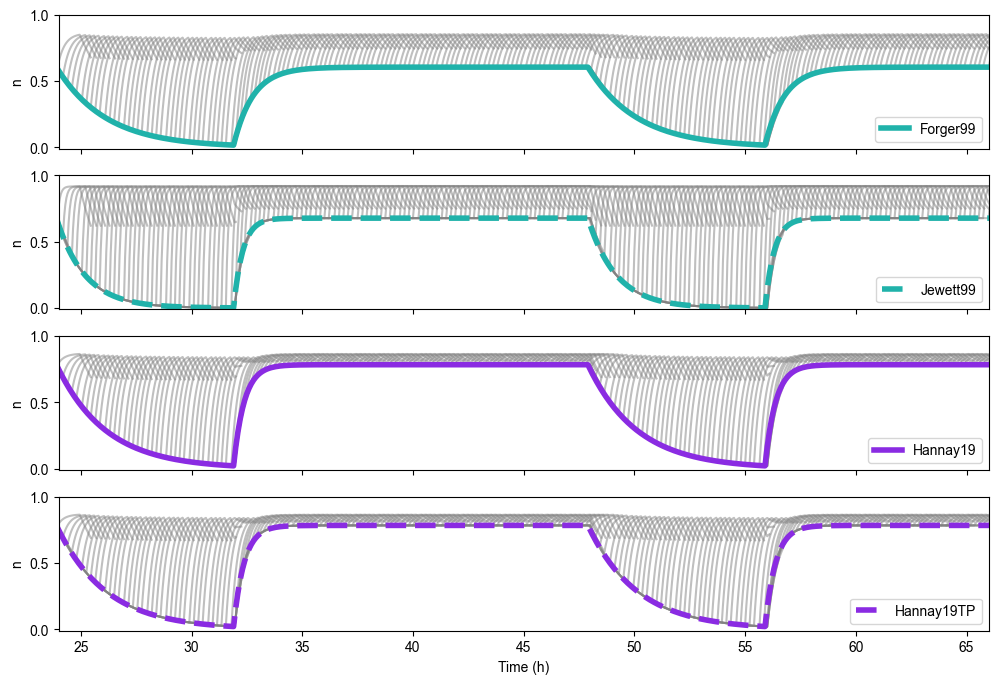

In [ ]:
n_variable_index = {
    'Forger99': 2,
    'Jewett99': 2,
    'Hannay19': 2,
    'Hannay19TP': 4,
}
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True)
for i, model in enumerate(model_list):
    n_index = n_variable_index[str(model)]
    # Control
    control_trajectory = trajectories[str(model)][str(0)]['control']
    axs[i].plot(control_trajectory.time, control_trajectory.states[:,n_index], label=str(model),
                color=colors[str(model)], linestyle=linestyles[str(model)], lw=4.0, zorder=1)
    axs[i].set_ylabel("n")
    axs[i].legend()
    for pulse_index in range(pulse_num):
        pulse_trajectory = trajectories[str(model)][str(pulse_index)]['pulse_second_part']
        axs[i].plot(pulse_trajectory.time, pulse_trajectory.states[:,n_index], alpha=0.5,
                    color="gray", zorder=0)

plt.xlim(24, 66)
plt.ylim(-0.01, 1.0)
plt.xlabel("Time (h)")
plt.show()

### Compare light processing functions

In [ ]:
def simple_alpha(light, alpha_0, p, I_0):
    return alpha_0 * pow(light/I_0, p)

def complex_alpha(light, alpha_0, p, I_0):
    return alpha_0 * pow(light, p) / (pow(light, p) + I_0)

alpha_0 = {
    'Forger99': 0.05,
    'Jewett99': 0.16,
    'Hannay19': 0.05,
    'Hannay19TP': 0.05,
}
p = {
    'Forger99': 0.5,
    'Jewett99': 0.6,
    'Hannay19': 1.5,
    'Hannay19TP': 1.5,
}
I_0 = {
    'Forger99': 9500,
    'Jewett99': 9500,
    'Hannay19': 9325,
    'Hannay19TP': 9325,
}
alpha_type = {
    'Forger99': simple_alpha,
    'Jewett99': simple_alpha,
    'Hannay19': complex_alpha,
    'Hannay19TP': complex_alpha,
}
linewidths = {
    'Forger99': 2.5,
    'Jewett99': 2.5,
    'Hannay19': 1.5,
    'Hannay19TP': 3.0,
}

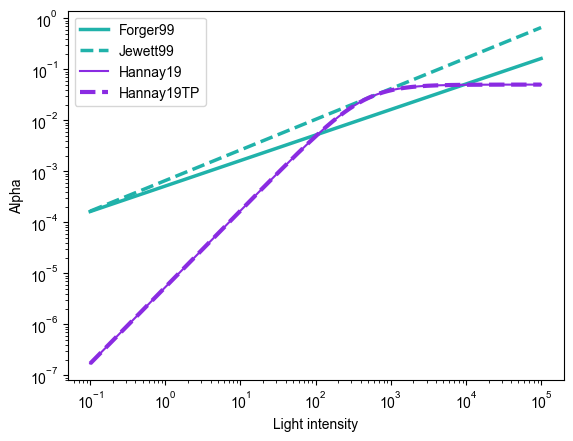

In [ ]:
for model in model_list:
    light = np.logspace(-1, 5, 1000)
    alpha = alpha_type[str(model)]
    response = alpha(light, alpha_0[str(model)], p[str(model)], I_0[str(model)])
    plt.plot(light, response, label=str(model), lw=linewidths[str(model)], color=colors[str(model)], 
             linestyle=linestyles[str(model)])

plt.legend()
plt.xlabel("Light intensity")
plt.ylabel("Alpha")
plt.xscale('log')
plt.yscale('log')
plt.show()

